In [69]:
from simulator.game15 import Grid
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
n_shuffles=10
n_samples=100
grid = Grid(5)
for _ in range(2):
    grid.reset()
    grid.shuffle_n(n_shuffles)
    print(grid.get_state())

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 24, 10, 11, 12, 14, 9, 15, 16, 17, 13, 18, 20, 21, 22, 23, 19)


In [40]:
from n_puzzle.envs import NPuzzleEnv
env = NPuzzleEnv({}, n=5)

In [65]:
num_samples=1000
empirical_k = []
for _ in tqdm(range(num_samples)):
    observation, info = env.reset(options={"k_moves": 100})
    k = env.get_effective_k(info["shuffle"])
    empirical_k.append(k)

100%|██████████| 1000/1000 [00:08<00:00, 115.49it/s]


Text(0, 0.5, '# of shuffles')

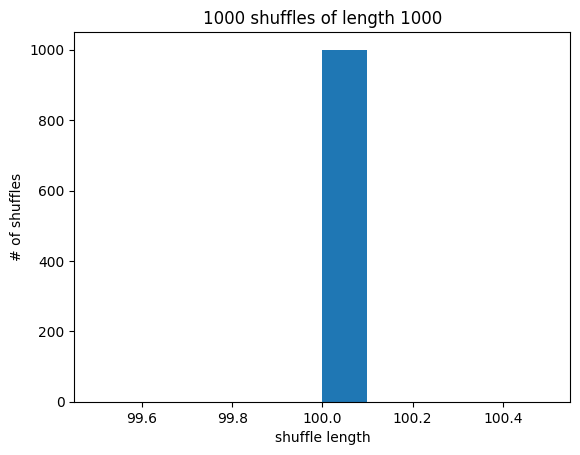

In [66]:
plt.hist(empirical_k)
plt.title("1000 shuffles of length 1000")
plt.xlabel("shuffle length")
plt.ylabel("# of shuffles")

In [37]:
num_samples=1000
solved = []
for _ in tqdm(range(num_samples)):
    observation, info = env.reset(options={"k_moves": 5})
    print(env._get_obs())
    solution = env.get_unshuffle(info["shuffle"])
    for move in solution[:-1]:
        env.step(move)
    last = env.step(move)
    if not last[2]:
        print(info["shuffle"])
        print(solution)
        print(env._get_obs())
        break
    solved.append(last[2])

  0%|          | 0/1000 [00:00<?, ?it/s]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 23 18]
 [20 21 22 24 19]]
[0 2 1]
[0 3 1]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 24]
 [20 21 22 23 19]]


In [32]:
solved

[True]